В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

#Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).


## a) Для отображения картинки воспользуйтесь вспомогательной функцией:

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

## b) Для загрузки картинки можно использовать код: img = cv.imread(path)

In [ ]:
image = cv2.imread('1.jpg', cv2.IMREAD_COLOR)

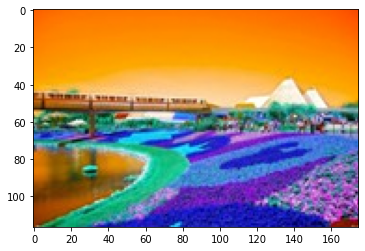

<Figure size 504x360 with 0 Axes>

In [ ]:
plt.imshow(image)
plt.figure(figsize=(7,5))
plt.show();

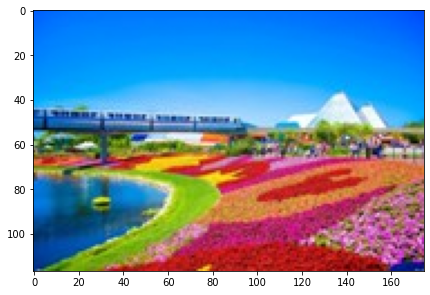

In [ ]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  # Преобразование из BGR в RGB
plt.figure(figsize=(7,5))
plt.imshow(image)
plt.show()

In [ ]:
# draw_picture(image, 'Яркая клумба')

In [ ]:
image.shape

(117, 175, 3)

Созданный объект - трехмерный массив с высотой, шириной и третьим измерением с количеством цветов пикселя красного, зеленого и синего (RGB). будем кластеризовать интенсивности пикселей изображения RGB.

# 2. Реализуйте три модели кластеризации:

## a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [ ]:
X = image.reshape(-1,3) # делаем из изображения плоский массив пикселей

In [ ]:
X = np.float32(X)

In [ ]:
# кластер
kmeans_K2 = KMeans(n_clusters = 2, random_state=42).fit(X)
kmeans_K5 = KMeans(n_clusters = 5, random_state=42).fit(X)
kmeans_K10 = KMeans(n_clusters = 10, random_state=42).fit(X)
kmeans_K20 = KMeans(n_clusters = 20, random_state=42).fit(X)

In [ ]:
# Сегментация цветов
segmented_kmeans_K2 = kmeans_K2.cluster_centers_[kmeans_K2.labels_]
segmented_kmeans_K2 = np.uint8(segmented_kmeans_K2)
segmented_kmeans_K2 = segmented_kmeans_K2.reshape(image.shape)
segmented_kmeans_K5 = kmeans_K5.cluster_centers_[kmeans_K5.labels_]
segmented_kmeans_K5 = np.uint8(segmented_kmeans_K5)
segmented_kmeans_K5 = segmented_kmeans_K5.reshape(image.shape)
segmented_kmeans_K10 = kmeans_K10.cluster_centers_[kmeans_K10.labels_]
segmented_kmeans_K10 = np.uint8(segmented_kmeans_K10)
segmented_kmeans_K10 = segmented_kmeans_K10.reshape(image.shape)
segmented_kmeans_K20 = kmeans_K20.cluster_centers_[kmeans_K20.labels_]
segmented_kmeans_K20 = np.uint8(segmented_kmeans_K20)
segmented_kmeans_K20 = segmented_kmeans_K20.reshape(image.shape)

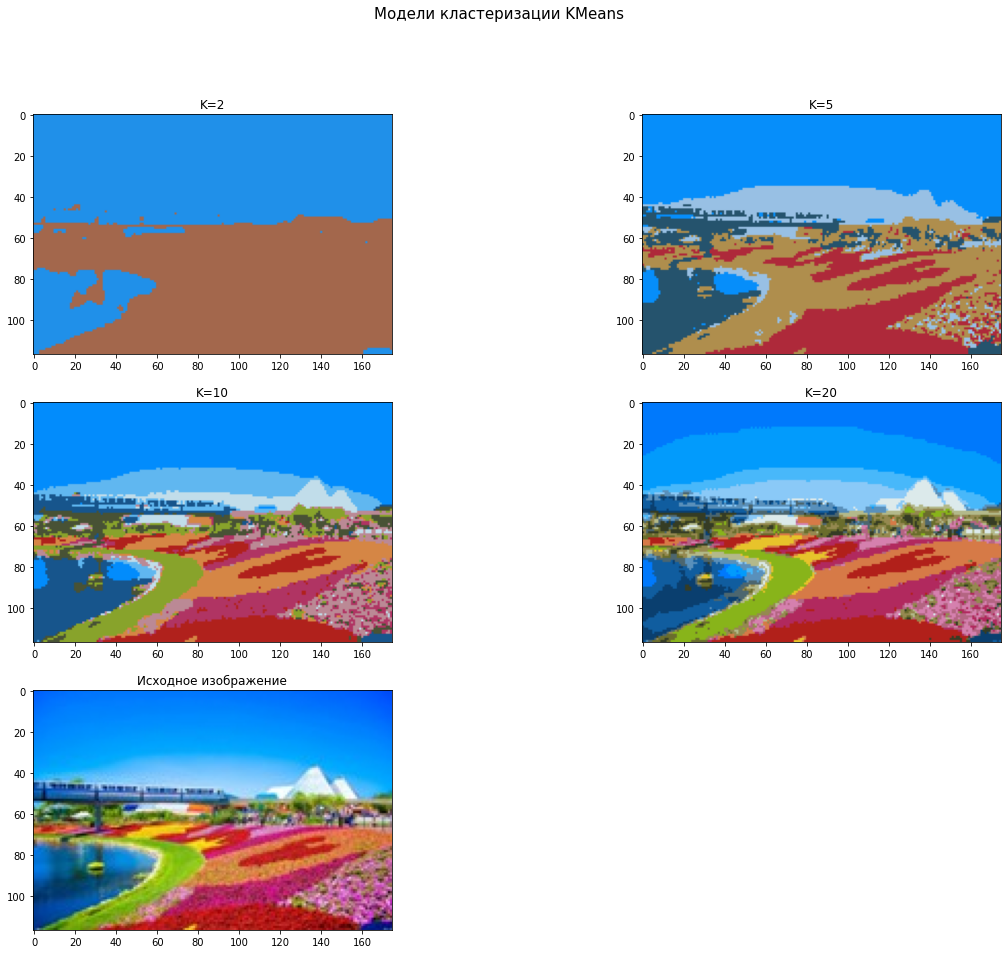

In [ ]:
plt.figure(figsize=(20,15))

plt.suptitle('Модели кластеризации KMeans', fontsize=15)

plt.subplot(3,2,1)
plt.imshow(segmented_kmeans_K2)
plt.title('K=2')

plt.subplot(3,2,2)
plt.imshow(segmented_kmeans_K5)
plt.title('K=5')

plt.subplot(3,2,3)
plt.imshow(segmented_kmeans_K10)
plt.title('K=10')

plt.subplot(3,2,4)
plt.imshow(segmented_kmeans_K20)
plt.title('K=20')

plt.subplot(3,2,5)
plt.imshow(image)
plt.title('Исходное изображение')

plt.show()

## b) DBSCAN

Метод не требует предварительных предположений о числе кластеров, но нужно настроить два других параметра: eps и min_samples. Данные параметры – это соответственно максимальное расстояние между соседними точками и минимальное число точек в окрестности (количество соседей), когда можно говорить, что эти экземпляры данных образуют один кластер.

In [ ]:
X1 = image.reshape(-1,3)

In [ ]:
X1.shape

(20475, 3)

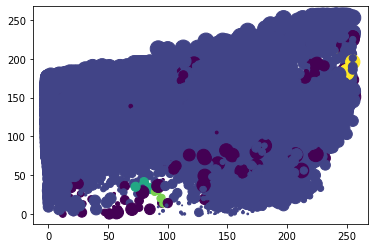

In [ ]:
scan_moons = DBSCAN(eps=15)
preds = scan_moons.fit_predict(X1)
plt.scatter(X1[:,0], X1[:,1], X1[:,2], c=preds)
plt.show()

In [ ]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
len(set(preds)), set(preds)

(6, {-1, 0, 1, 2, 3, 4})

In [ ]:
labels = scan_moons.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Расчетное количество кластеров: %d' % n_clusters_)
print("Расчетное количество точек шума: %d" % n_noise_)

Расчетное количество кластеров: 5
Расчетное количество точек шума: 116


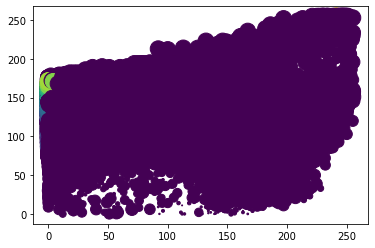

In [ ]:
scan_moons = DBSCAN(eps=0.01)# указываем eps
preds = scan_moons.fit_predict(X1)
plt.scatter(X1[:,0], X1[:,1], X1[:,2], c=preds)
plt.show()

In [ ]:
preds

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
labels = scan_moons.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Расчетное количество кластеров: %d' % n_clusters_)
print("Расчетное количество точек шума: %d" % n_noise_)

Расчетное количество кластеров: 305
Расчетное количество точек шума: 14693


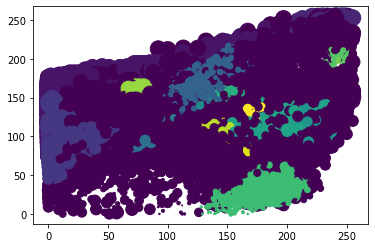

In [ ]:
scan_moons = DBSCAN(eps=10, min_samples=20) # путем подбора правильного eps приходим к верному кол-ву кластеров
preds = scan_moons.fit_predict(X1)
labels_clast = pd.Series(preds)
plt.scatter(X1[:,0], X1[:,1], X1[:,2], c=preds)
plt.show()

In [ ]:
preds

array([ 0,  0,  0, ..., -1, -1, -1])

In [ ]:
 len(set(preds)), set(preds)

(20, {-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18})

In [ ]:
labels = scan_moons.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Расчетное количество кластеров: %d' % n_clusters_)
print("Расчетное количество точек шума: %d" % n_noise_)

Расчетное количество кластеров: 19
Расчетное количество точек шума: 5414


In [ ]:
X2 = pd.DataFrame(X1)

In [ ]:
X2['cluster']=labels_clast #Добавляем классификацию кластера как колонку

In [ ]:
X2.set_index('cluster', inplace=True)#Делаем новую колонку индексом

In [ ]:
X2.head(1)

,0,1,2
cluster,,,
0,0,94,250


In [ ]:
centoid_18 = np.mean(X1[preds == 18], axis=0)
centoid_17 = np.mean(X1[preds == 17], axis=0)
centoid_16 = np.mean(X1[preds == 16], axis=0)
centoid_15 = np.mean(X1[preds == 15], axis=0)
centoid_14 = np.mean(X1[preds == 14], axis=0)
centoid_13 = np.mean(X1[preds == 13], axis=0)
centoid_12 = np.mean(X1[preds == 12], axis=0)
centoid_11 = np.mean(X1[preds == 11], axis=0)
centoid_10 = np.mean(X1[preds == 10], axis=0)
centoid_9 = np.mean(X1[preds == 9], axis=0)
centoid_8 = np.mean(X1[preds == 8], axis=0)
centoid_7 = np.mean(X1[preds == 7], axis=0)
centoid_6 = np.mean(X1[preds == 6], axis=0)
centoid_5 = np.mean(X1[preds == 5], axis=0)
centoid_4 = np.mean(X1[preds == 4], axis=0)
centoid_3 = np.mean(X1[preds == 3], axis=0)
centoid_2= np.mean(X1[preds == 2], axis=0,)
centoid_1 = np.mean(X1[preds == 1], axis=0)
centoid_0 = np.mean(X1[preds == 0], axis=0)
centoid_1_ = np.mean(X1[preds == -1], axis=0)

In [ ]:
X2.loc[18]=centoid_18
X2.loc[17]=centoid_17
X2.loc[16]=centoid_16
X2.loc[15]=centoid_15
X2.loc[14]=centoid_14
X2.loc[13]=centoid_13
X2.loc[12]=centoid_12
X2.loc[11]=centoid_11
X2.loc[10]=centoid_10
X2.loc[9]=centoid_9
X2.loc[8]=centoid_8
X2.loc[7]=centoid_7
X2.loc[6]=centoid_6
X2.loc[5]=centoid_5
X2.loc[4]=centoid_4
X2.loc[3]=centoid_3
X2.loc[2]=centoid_2
X2.loc[1]=centoid_1
X2.loc[0]=centoid_0
X2.loc[-1]=centoid_1_

In [ ]:
# Сегментация цветов
segmented_dbscan = X2.values.reshape(image.shape)

In [ ]:
segmented_dbscan = np.uint8(segmented_dbscan)

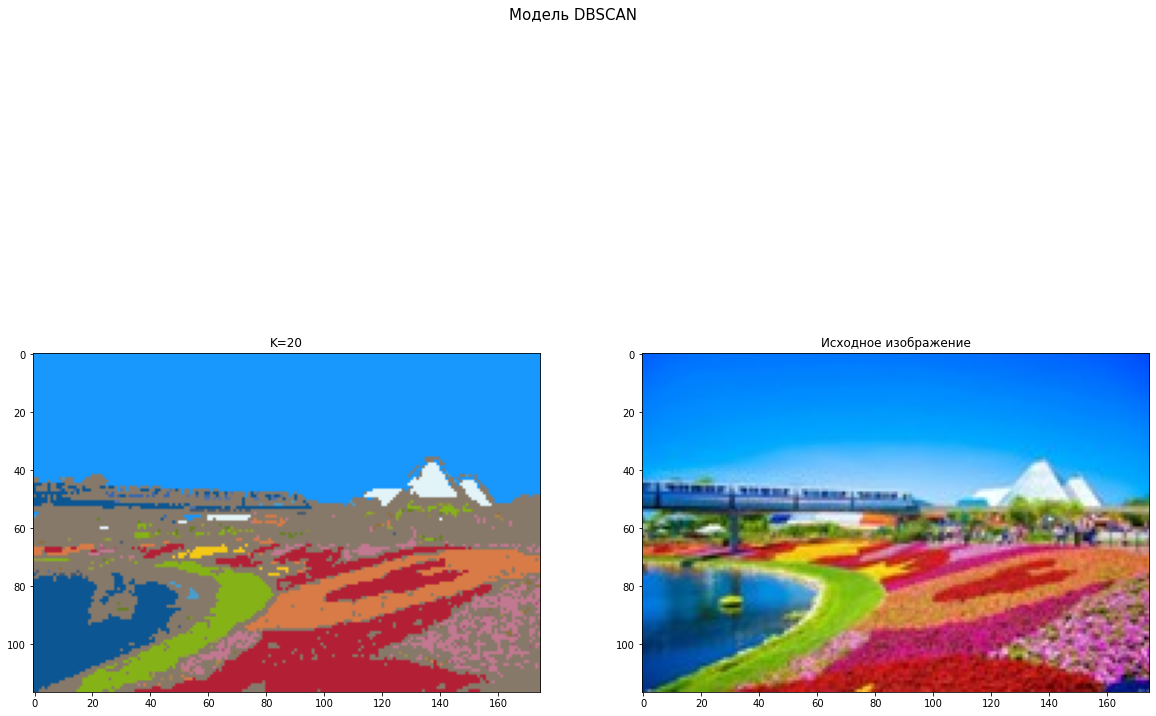

In [ ]:
plt.figure(figsize=(20,15))

plt.suptitle('Модель DBSCAN', fontsize=15)

plt.subplot(1,2,1)
plt.imshow(segmented_dbscan)
plt.title('K=20')

plt.subplot(1,2,2)
plt.imshow(image)
plt.title('Исходное изображение')

plt.show()

## c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [ ]:
X3 = image.reshape(-1,3)

In [ ]:
aggl_K2 = AgglomerativeClustering(n_clusters=2)
preds_K2 = aggl_K2.fit_predict(X3)
aggl_K5 = AgglomerativeClustering(n_clusters=5)
preds_K5 = aggl_K5.fit_predict(X3)
aggl_K10 = AgglomerativeClustering(n_clusters=10)
preds_K10 = aggl_K10.fit_predict(X3)
aggl_K20 = AgglomerativeClustering(n_clusters=20)
preds_K20 = aggl_K20.fit_predict(X3)

In [ ]:
labels_clast_K2 = pd.Series(preds_K2)
labels_clast_K5 = pd.Series(preds_K5)
labels_clast_K10 = pd.Series(preds_K10)
labels_clast_K20 = pd.Series(preds_K20)

In [ ]:
set(preds_K2), set(preds_K5),set(preds_K10),set(preds_K20)

({0, 1},
 {0, 1, 2, 3, 4},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19})

In [ ]:
X3_2 = pd.DataFrame(X3)
X3_2['cluster']=labels_clast_K2
X3_2.set_index('cluster', inplace=True)
X3_5 = pd.DataFrame(X3)
X3_5['cluster']=labels_clast_K5
X3_5.set_index('cluster', inplace=True)
X3_10 = pd.DataFrame(X3)
X3_10['cluster']=labels_clast_K10
X3_10.set_index('cluster', inplace=True)
X3_20 = pd.DataFrame(X3)
X3_20['cluster']=labels_clast_K20
X3_20.set_index('cluster', inplace=True)

In [ ]:
centoid_1_K2 = np.mean(X3[preds_K2 == 1], axis=0)
centoid_0_K2 = np.mean(X3[preds_K2 == 0], axis=0)
centoid_4_K5 = np.mean(X3[preds_K5 == 4], axis=0)
centoid_3_K5 = np.mean(X3[preds_K5 == 3], axis=0)
centoid_2_K5 = np.mean(X3[preds_K5 == 2], axis=0)
centoid_1_K5 = np.mean(X3[preds_K5 == 1], axis=0)
centoid_0_K5 = np.mean(X3[preds_K5 == 0], axis=0)
centoid_9_K10 = np.mean(X3[preds_K10 == 9], axis=0)
centoid_8_K10 = np.mean(X3[preds_K10 == 8], axis=0)
centoid_7_K10 = np.mean(X3[preds_K10 == 7], axis=0)
centoid_6_K10 = np.mean(X3[preds_K10 == 6], axis=0)
centoid_5_K10 = np.mean(X3[preds_K10 == 5], axis=0)
centoid_4_K10 = np.mean(X3[preds_K10 == 4], axis=0)
centoid_3_K10 = np.mean(X3[preds_K10 == 3], axis=0)
centoid_2_K10 = np.mean(X3[preds_K10 == 2], axis=0)
centoid_1_K10 = np.mean(X3[preds_K10 == 1], axis=0)
centoid_0_K10 = np.mean(X3[preds_K10 == 0], axis=0)
centoid_19_K20 = np.mean(X3[preds_K20 == 19], axis=0)
centoid_18_K20 = np.mean(X3[preds_K20 == 18], axis=0)
centoid_17_K20 = np.mean(X3[preds_K20 == 17], axis=0)
centoid_16_K20 = np.mean(X3[preds_K20 == 16], axis=0)
centoid_15_K20 = np.mean(X3[preds_K20 == 15], axis=0)
centoid_14_K20 = np.mean(X3[preds_K20 == 14], axis=0)
centoid_13_K20 = np.mean(X3[preds_K20 == 13], axis=0)
centoid_12_K20 = np.mean(X3[preds_K20 == 12], axis=0)
centoid_11_K20 = np.mean(X3[preds_K20 == 11], axis=0)
centoid_10_K20 = np.mean(X3[preds_K20 == 10], axis=0)
centoid_9_K20 = np.mean(X3[preds_K20 == 9], axis=0)
centoid_8_K20 = np.mean(X3[preds_K20 == 8], axis=0)
centoid_7_K20 = np.mean(X3[preds_K20 == 7], axis=0)
centoid_6_K20 = np.mean(X3[preds_K20 == 6], axis=0)
centoid_5_K20 = np.mean(X3[preds_K20 == 5], axis=0)
centoid_4_K20 = np.mean(X3[preds_K20 == 4], axis=0)
centoid_3_K20 = np.mean(X3[preds_K20 == 3], axis=0)
centoid_2_K20 = np.mean(X3[preds_K20 == 2], axis=0)
centoid_1_K20 = np.mean(X3[preds_K20 == 1], axis=0)
centoid_0_K20 = np.mean(X3[preds_K20 == 0], axis=0)

In [ ]:
X3_2.loc[1]=centoid_1_K2
X3_2.loc[0]=centoid_0_K2
X3_5.loc[4]=centoid_4_K5
X3_5.loc[3]=centoid_3_K5
X3_5.loc[2]=centoid_2_K5
X3_5.loc[1]=centoid_1_K5
X3_5.loc[0]=centoid_0_K5
X3_10.loc[9]=centoid_9_K10
X3_10.loc[8]=centoid_8_K10
X3_10.loc[7]=centoid_7_K10
X3_10.loc[6]=centoid_6_K10
X3_10.loc[5]=centoid_5_K10
X3_10.loc[4]=centoid_4_K10
X3_10.loc[3]=centoid_3_K10
X3_10.loc[2]=centoid_2_K10
X3_10.loc[1]=centoid_1_K10
X3_10.loc[0]=centoid_0_K10
X3_20.loc[19]=centoid_19_K20
X3_20.loc[18]=centoid_18_K20
X3_20.loc[17]=centoid_17_K20
X3_20.loc[16]=centoid_16_K20
X3_20.loc[15]=centoid_15_K20
X3_20.loc[14]=centoid_14_K20
X3_20.loc[13]=centoid_13_K20
X3_20.loc[12]=centoid_12_K20
X3_20.loc[11]=centoid_11_K20
X3_20.loc[10]=centoid_10_K20
X3_20.loc[9]=centoid_9_K20
X3_20.loc[8]=centoid_8_K20
X3_20.loc[7]=centoid_7_K20
X3_20.loc[6]=centoid_6_K20
X3_20.loc[5]=centoid_5_K20
X3_20.loc[4]=centoid_4_K20
X3_20.loc[3]=centoid_3_K20
X3_20.loc[2]=centoid_2_K20
X3_20.loc[1]=centoid_1_K20
X3_20.loc[0]=centoid_0_K20

In [ ]:
segmented_aggl_K2 = X3_2.values.reshape(image.shape)
segmented_aggl_K2 = np.uint8(segmented_aggl_K2)
segmented_aggl_K5 = X3_5.values.reshape(image.shape)
segmented_aggl_K5 = np.uint8(segmented_aggl_K5)
segmented_aggl_K10 = X3_10.values.reshape(image.shape)
segmented_aggl_K10 = np.uint8(segmented_aggl_K10)
segmented_aggl_K20 = X3_20.values.reshape(image.shape)
segmented_aggl_K20 = np.uint8(segmented_aggl_K20)

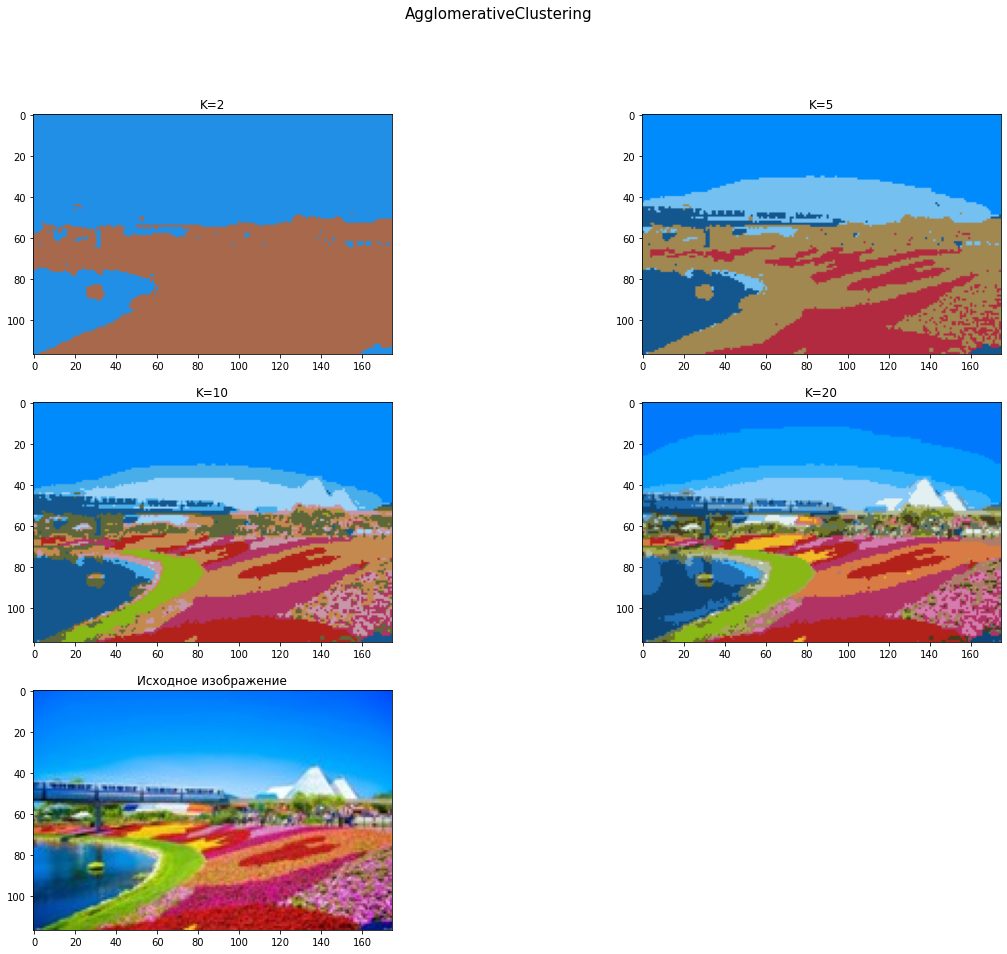

In [ ]:
plt.figure(figsize=(20,15))

plt.suptitle('AgglomerativeClustering', fontsize=15)

plt.subplot(3,2,1)
plt.imshow(segmented_aggl_K2 )
plt.title('K=2')

plt.subplot(3,2,2)
plt.imshow(segmented_aggl_K5 )
plt.title('K=5')

plt.subplot(3,2,3)
plt.imshow(segmented_aggl_K10 )
plt.title('K=10')

plt.subplot(3,2,4)
plt.imshow(segmented_aggl_K20 )
plt.title('K=20')

plt.subplot(3,2,5)
plt.imshow(image)
plt.title('Исходное изображение')

plt.show()

# 3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.

Метрика структурного сходства SSIM (англ. Structural SIMilarity – SSIM). Считается более точно учитывающими особенности восприятия человека. SSIM это альтернатива PSNR, которая может лучше коррелировать с ощущаемым качеством сжатого изображения.

In [ ]:
from skimage.metrics import structural_similarity as ssim
s_kmeans_K2 = ssim(image, segmented_kmeans_K2, multichannel=True)
s_kmeans_K5 = ssim(image, segmented_kmeans_K5, multichannel=True)
s_kmeans_K10 = ssim(image, segmented_kmeans_K10, multichannel=True)
s_kmeans_K20 = ssim(image, segmented_kmeans_K20, multichannel=True)
s_dbscan = ssim(image, segmented_dbscan, multichannel=True)
s_aggl_K2 = ssim(image, segmented_aggl_K2, multichannel=True)
s_aggl_K5 = ssim(image, segmented_aggl_K5, multichannel=True)
s_aggl_K10 = ssim(image, segmented_aggl_K10, multichannel=True)
s_aggl_K20 = ssim(image, segmented_aggl_K20, multichannel=True)

In [ ]:
accuracy_dict = {'KMeans K=2': s_kmeans_K2,
            'KMeans K=5': s_kmeans_K5,
            'KMeans K=10': s_kmeans_K10,
            'KMeans K=20': s_kmeans_K20,
            'DBSCAN': s_dbscan,
            'AgglomerativeClustering K=2': s_aggl_K2,
            'AgglomerativeClustering K=5': s_aggl_K5,
            'AgglomerativeClustering K=10': s_aggl_K10,
            'AgglomerativeClustering K=20': s_aggl_K20}
accuracy_dict = pd.Series(accuracy_dict)

res = pd.DataFrame({'Метрика SSIM': accuracy_dict})
res
res.style.highlight_max(color = 'lightgreen', axis = 0)

,Метрика SSIM
KMeans K=2,0.311086
KMeans K=5,0.529641
KMeans K=10,0.710084
KMeans K=20,0.785659
DBSCAN,0.439289
AgglomerativeClustering K=2,0.308943
AgglomerativeClustering K=5,0.499934
AgglomerativeClustering K=10,0.688126
AgglomerativeClustering K=20,0.767394


# 4. Сформулируйте выводы по проделанной работе. a) Какая модель показала лучший результат?

Лучший результат показала модель KMeans с количеством кластеров 20.

Модель AgglomerativeClustering показала себя чуть хуже, но тоже неплохо.

На последнем месте модель DBSCAN.

Вывод: для сокращения числа цветов в палитре изображения лучше использовать модель кластеризации KMeans.

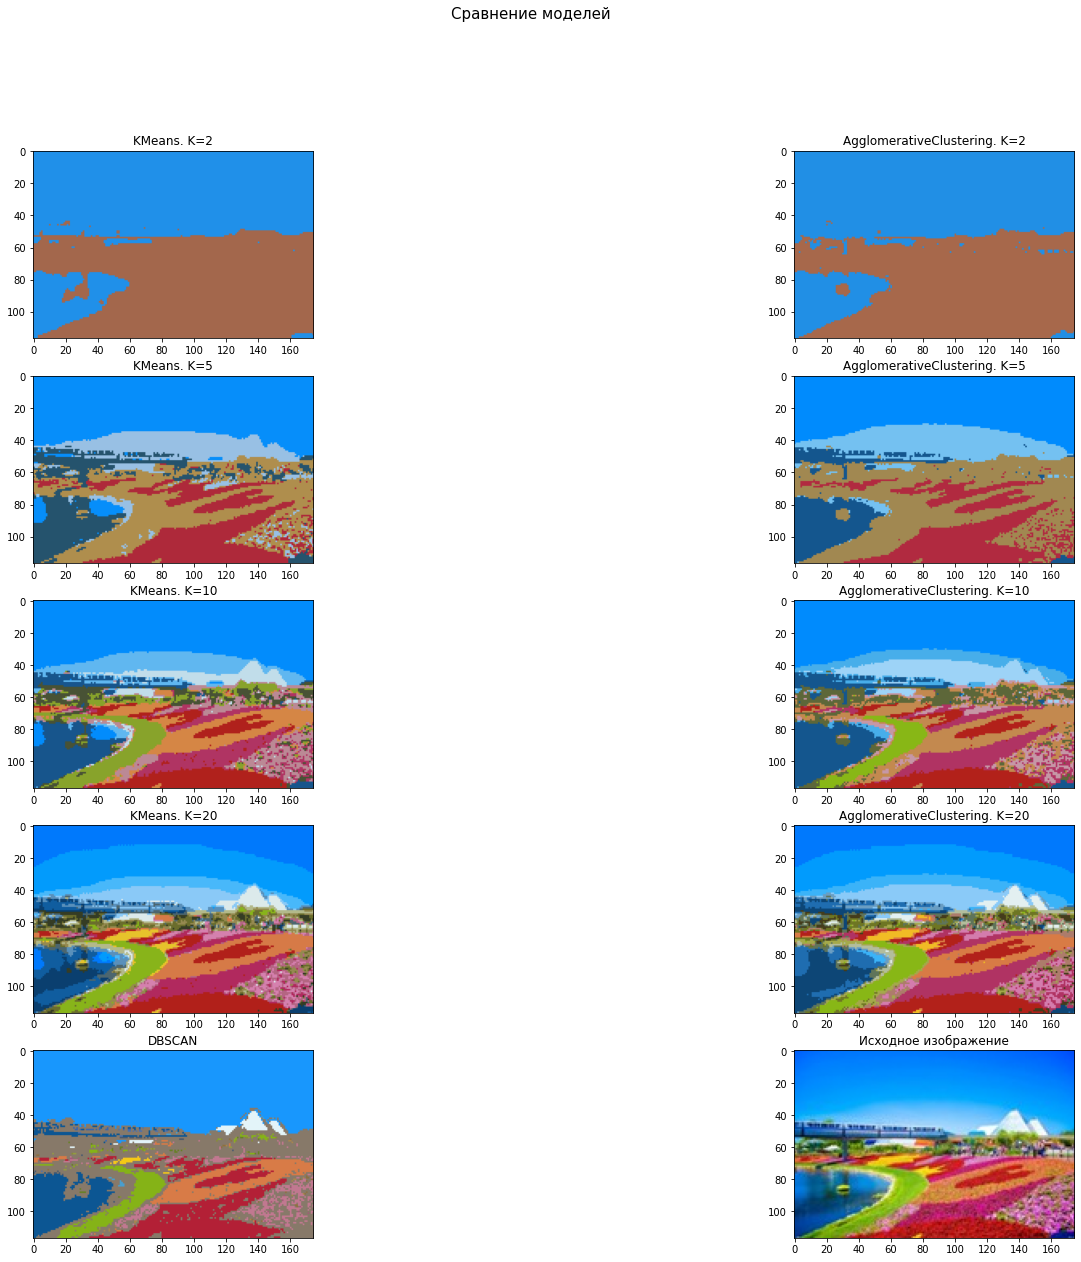

In [ ]:
plt.figure(figsize=(25,20))

plt.suptitle('Сравнение моделей', fontsize=15)

plt.subplot(5,2,1)
plt.imshow(segmented_kmeans_K2)
plt.title('KMeans. K=2')
plt.subplot(5,2,2)
plt.imshow(segmented_aggl_K2 )
plt.title('AgglomerativeClustering. K=2')

plt.subplot(5,2,3)
plt.imshow(segmented_kmeans_K5)
plt.title('KMeans. K=5')
plt.subplot(5,2,4)
plt.imshow(segmented_aggl_K5 )
plt.title('AgglomerativeClustering. K=5')

plt.subplot(5,2,5)
plt.imshow(segmented_kmeans_K10)
plt.title('KMeans. K=10')
plt.subplot(5,2,6)
plt.imshow(segmented_aggl_K10 )
plt.title('AgglomerativeClustering. K=10')

plt.subplot(5,2,7)
plt.imshow(segmented_kmeans_K20)
plt.title('KMeans. K=20')
plt.subplot(5,2,8)
plt.imshow(segmented_aggl_K20 )
plt.title('AgglomerativeClustering. K=20')

plt.subplot(5,2,9)
plt.imshow(segmented_dbscan )
plt.title('DBSCAN')
plt.subplot(5,2,10)
plt.imshow(image)
plt.title('Исходное изображение')

plt.show()